In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.ExcelFile('/Users/user/desktop/LoanStats3a.xlsx')

In [3]:
df1 = data.parse(0)

In [4]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,pub_rec_bankruptcies,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,met_credit_policy
0,NaN,NaN,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,2018-08-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
1,NaN,NaN,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,2016-10-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
2,NaN,NaN,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,2017-06-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
3,NaN,NaN,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,2016-04-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
4,NaN,NaN,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,2018-04-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y


# Cleaning Data

In [5]:
member_id_entries = list(range(1,42536))
df1['member_id'] = member_id_entries
df1 = df1.set_index('member_id')

In [6]:
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,pub_rec_bankruptcies,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,met_credit_policy
member_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,...,2018-08-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
2,NaN,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,...,2016-10-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
3,NaN,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,...,2017-06-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
4,NaN,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,...,2016-04-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
5,NaN,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,...,2018-04-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y


In [7]:
# Deleting columns.
del df1['id']

In [8]:
# Vague data, not informative
del df1['title']
del df1['emp_title']
del df1['desc']

In [9]:
# Settlements are post loans and can't be used for prediction of a loans that preceeds settlement. 
del df1['debt_settlement_flag']
del df1['debt_settlement_flag_date']
del df1['settlement_status']
del df1['settlement_date']
del df1['settlement_amount']
del df1['settlement_percentage']
del df1['settlement_term']
del df1['met_credit_policy']

In [10]:
del df1['earliest_cr_line']
del df1['last_pymnt_d']
del df1['last_credit_pull_d']

In [11]:
del df1['pymnt_plan']
del df1['initial_list_status']
del df1['issue_d']

In [12]:
del df1['recoveries']

In [13]:
del df1['zip_code']
del df1['addr_state']
del df1['total_pymnt_inv']
del df1['total_rec_late_fee']
del df1['collection_recovery_fee']

In [14]:
del df1['last_pymnt_amnt']

In [15]:
del df1['sub_grade']

In [16]:
del df1['mths_since_last_delinq'] # over half of data missing
del df1['mths_since_last_record'] # over half of data missing
del df1['total_rec_prncp']
del df1['total_rec_int'] 

In [17]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1,5000,5000,4975.0,36 months,0.1065,162.87,B,10+ years,RENT,24000.0,...,27.65,0.0,1.0,3.0,0.0,13648,0.837,9.0,5863.155187,0.0
2,2500,2500,2500.0,60 months,0.1527,59.83,C,< 1 year,RENT,30000.0,...,1.00,0.0,5.0,3.0,0.0,1687,0.094,4.0,1014.530000,0.0
3,2400,2400,2400.0,36 months,0.1596,84.33,C,10+ years,RENT,12252.0,...,8.72,0.0,2.0,2.0,0.0,2956,0.985,10.0,3005.666844,0.0
4,10000,10000,10000.0,36 months,0.1349,339.31,C,10+ years,RENT,49200.0,...,20.00,0.0,1.0,10.0,0.0,5598,0.210,37.0,12231.890000,0.0
5,3000,3000,3000.0,60 months,0.1269,67.79,B,1 year,RENT,80000.0,...,17.94,0.0,0.0,15.0,0.0,27783,0.539,38.0,4066.908161,0.0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 1 to 42535
Data columns (total 23 columns):
loan_amnt               42535 non-null int64
funded_amnt             42535 non-null int64
funded_amnt_inv         42535 non-null float64
term                    42535 non-null object
int_rate                42535 non-null float64
installment             42535 non-null float64
grade                   42535 non-null object
emp_length              41423 non-null object
home_ownership          42535 non-null object
annual_inc              42531 non-null float64
verification_status     42535 non-null object
loan_status             42535 non-null object
purpose                 42535 non-null object
dti                     42535 non-null float64
delinq_2yrs             42506 non-null float64
inq_last_6mths          42506 non-null float64
open_acc                42506 non-null float64
pub_rec                 42506 non-null float64
revol_bal               42535 non-null int64
revol_util 

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 1 to 42535
Data columns (total 23 columns):
loan_amnt               42535 non-null int64
funded_amnt             42535 non-null int64
funded_amnt_inv         42535 non-null float64
term                    42535 non-null object
int_rate                42535 non-null float64
installment             42535 non-null float64
grade                   42535 non-null object
emp_length              41423 non-null object
home_ownership          42535 non-null object
annual_inc              42531 non-null float64
verification_status     42535 non-null object
loan_status             42535 non-null object
purpose                 42535 non-null object
dti                     42535 non-null float64
delinq_2yrs             42506 non-null float64
inq_last_6mths          42506 non-null float64
open_acc                42506 non-null float64
pub_rec                 42506 non-null float64
revol_bal               42535 non-null int64
revol_util 

In [20]:
df1.columns[df1.isna().any()].tolist()

['emp_length',
 'annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

In [21]:
# filling missing data according to what makes most sense on a case by case basis. 
df1['annual_inc'] = df1['annual_inc'].fillna(value=df1.annual_inc.mode())
df1['delinq_2yrs'] = df1['delinq_2yrs'].fillna(value = df1.delinq_2yrs.mode())
df1['open_acc'] = df1['open_acc'].fillna(value = df1.open_acc.median())
df1.delinq_2yrs = df1.delinq_2yrs.fillna(value = 0)
df1.pub_rec = df1.pub_rec.fillna(value = df1.pub_rec.mean())
df1['revol_util'] = df1['revol_util'].fillna(value = df1.revol_util.mean())
df1['total_acc'] = df1['total_acc'].fillna(value = df1.total_acc.mean())
df1['emp_length'] = df1['emp_length'].fillna(method = 'ffill')
df1['inq_last_6mths'] = df1['emp_length'].fillna(value=1)
df1['pub_rec_bankruptcies'] = df1['emp_length'].fillna(method = 'ffill')

In [22]:
# Turning objects to category data types
df1.grade = df1.grade.astype('category')
df1.term = df1.term.astype('category')
df1.emp_length = df1.emp_length.astype('category')
df1.home_ownership = df1.home_ownership.astype('category')
df1.verification_status = df1.verification_status.astype('category')
df1.loan_status = df1.loan_status.astype('category')
df1.purpose = df1.purpose.astype('category')

In [23]:
df1.loan_status = df1.loan_status.replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
df1.loan_status = df1.loan_status.replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')

In [24]:
df1['annual_inc'] = df1['annual_inc'].fillna(value=df1.annual_inc.mean())

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 1 to 42535
Data columns (total 23 columns):
loan_amnt               42535 non-null int64
funded_amnt             42535 non-null int64
funded_amnt_inv         42535 non-null float64
term                    42535 non-null category
int_rate                42535 non-null float64
installment             42535 non-null float64
grade                   42535 non-null category
emp_length              42535 non-null category
home_ownership          42535 non-null category
annual_inc              42535 non-null float64
verification_status     42535 non-null category
loan_status             42535 non-null category
purpose                 42535 non-null category
dti                     42535 non-null float64
delinq_2yrs             42535 non-null float64
inq_last_6mths          42535 non-null object
open_acc                42535 non-null float64
pub_rec                 42535 non-null float64
revol_bal               42535 non-null int6

In [26]:
pd.DataFrame(df1.columns)

,0
0,loan_amnt
1,funded_amnt
2,funded_amnt_inv
3,term
4,int_rate
5,installment
6,grade
7,emp_length
8,home_ownership
9,annual_inc


In [27]:
df1 = pd.get_dummies(df1)

In [28]:
del df1['loan_status_Does not meet the credit policy. Status:Charged Off']
del df1['loan_status_Does not meet the credit policy. Status:Fully Paid']

In [29]:
drop_columns = ['term_ 36 months', 'grade_A', 'emp_length_1 year', 'home_ownership_OTHER', 'verification_status_Not Verified',\
                'loan_status_Fully Paid', 'purpose_other', 'inq_last_6mths_< 1 year', 'pub_rec_bankruptcies_1 year']

In [30]:
df1 = df1.drop(columns=drop_columns)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 1 to 42535
Data columns (total 71 columns):
loan_amnt                              42535 non-null int64
funded_amnt                            42535 non-null int64
funded_amnt_inv                        42535 non-null float64
int_rate                               42535 non-null float64
installment                            42535 non-null float64
annual_inc                             42535 non-null float64
dti                                    42535 non-null float64
delinq_2yrs                            42535 non-null float64
open_acc                               42535 non-null float64
pub_rec                                42535 non-null float64
revol_bal                              42535 non-null int64
revol_util                             42535 non-null float64
total_acc                              42535 non-null float64
total_pymnt                            42535 non-null float64
term_ 60 months              

In [32]:
df1['loan_status_Charged Off'].mean()

0.1511931350652404

# Machine Learning Algorithms 

In [33]:
# Log.reg. model containing all grades. 

X = df1.drop('loan_status_Charged Off', axis=1)
y = df1['loan_status_Charged Off']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [34]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(logreg.coef_[0, ])})

In [35]:
coefficients

,Feature,Coefficients
0,loan_amnt,0.000010
1,funded_amnt,0.002277
2,funded_amnt_inv,-0.000019
3,int_rate,-0.000065
4,installment,-0.011117
5,annual_inc,-0.000015
6,dti,-0.023239
7,delinq_2yrs,0.000291
8,open_acc,-0.015436
9,pub_rec,0.000324


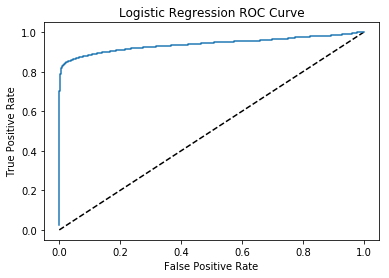

In [36]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [37]:
# AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9399791669783333

In [38]:
# CV AUC scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.94027338 0.94436393 0.94078927 0.94469722 0.94754042]


In [39]:
# CV AUC mean
print(np.mean(cv_scores))

0.94353284480049


In [40]:
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5,8,15)
param_grid = {'C':c_space, 'penalty':['l1','l2']}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
# Tuning hyperparameters C and l1/l2
print("Tuned Logistic Regression Parameter:",logreg_cv.best_params_)
print('Tuned Logistic Regression Accuracy:',logreg_cv.best_score_)

Tuned Logistic Regression Parameter: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9703144102065766


In [42]:
# Optimized aggregate log. reg.
logreg_tuned = LogisticRegression(C=8.483428982440725e-05, penalty='l1')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)
logreg_tuned.fit(X_train2, y_train2)
y_pred2 = logreg_tuned.predict(X_test2)

In [43]:
y_pred_prob2 = logreg_tuned.predict_proba(X_test2)[:,1] # what does the 1st column give?
roc_auc_score(y_test2, y_pred_prob2)

0.9363920692924477

In [44]:
y_pred_prob2

array([4.76369730e-04, 9.24764301e-04, 1.55058846e-03, ...,
       1.58572595e-06, 6.33252122e-01, 1.45302785e-01])

In [45]:
# CV AUC scores with hyperparameters
cv_scores2 = cross_val_score(logreg_tuned, X, y, cv=5, scoring='roc_auc')
print(cv_scores2)

[0.93734217 0.93701012 0.93804068 0.94107077 0.94879525]


In [46]:
print(np.mean(cv_scores2))

0.9404517970612967


In [47]:
# Optimized models CR
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
print(classification_report(y_test2, y_pred2))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      9063
          1       0.98      0.79      0.87      1571

avg / total       0.97      0.97      0.96     10634

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      9063
          1       0.99      0.80      0.89      1571

avg / total       0.97      0.97      0.97     10634



In [48]:
grade_a = df1.loc[df1['grade_B']==0].loc[df1['grade_C']==0].loc[df1['grade_D']==0].\
            loc[df1['grade_E']==0].loc[df1['grade_F']==0].loc[df1['grade_G']==0]
grade_b = df1.loc[df1['grade_B']==1]
grade_c = df1.loc[df1['grade_C']==1]
grade_d = df1.loc[df1['grade_D']==1]
grade_e = df1.loc[df1['grade_E']==1]
grade_f = df1.loc[df1['grade_F']==1]
grade_g = df1.loc[df1['grade_G']==1]

In [49]:
def logisticfunk(df, letter):
    Xf = df.drop('loan_status_Charged Off', axis=1)
    yf = df['loan_status_Charged Off']
    
    logreg_ = LogisticRegression()
    X_train_, X_test_, y_train_, y_test_ = train_test_split(Xf, yf, test_size=0.25, random_state=42)
    logreg_.fit(X_train_, y_train_)
    y_pred_ = logreg_.predict(X_test_)
    
    y_pred_prob_ = logreg_.predict_proba(X_test_)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test_, y_pred_prob_)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(letter)
    plt.show()

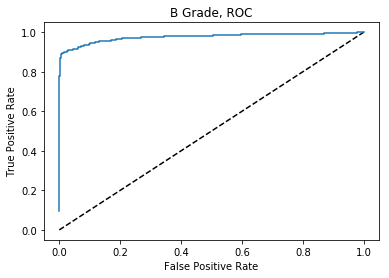

In [50]:
logisticfunk(grade_b, 'B Grade, ROC')

In [51]:
def AUC(df):
    """Mean of CV scores for Grade"""    
    Xf = df.drop('loan_status_Charged Off', axis=1)
    yf = df['loan_status_Charged Off']
    
    cv_scores = cross_val_score(logreg, Xf, yf, cv=5, scoring='roc_auc')
    return np.mean(cv_scores)   

In [52]:
def printfunk(df, whatever):
    print(whatever, AUC(df))

In [53]:
printfunk(grade_a, 'Grade A AUROC:')
printfunk(grade_b, 'Grade B AUROC:')
printfunk(grade_c, 'Grade C AUROC:')
printfunk(grade_d, 'Grade D AUROC:')
printfunk(grade_e, 'Grade E AUROC:')
printfunk(grade_f, 'Grade F AUROC:')
printfunk(grade_g, 'Grade G AUROC:')

Grade A AUROC: 0.9768320810741702
Grade B AUROC: 0.9700618985607564
Grade C AUROC: 0.9599095560582969
Grade D AUROC: 0.9569540270697449
Grade E AUROC: 0.9457249314077536
Grade F AUROC: 0.9516249015432188
Grade G AUROC: 0.9706778391778134


In [54]:
gradeauclist = [AUC(grade_b), AUC(grade_c), AUC(grade_a), AUC(grade_d), AUC(grade_e), AUC(grade_f), AUC(grade_g)]

In [55]:
print('Mean of the CV_means of all graded segmented models:', np.mean(gradeauclist))

Mean of the CV_means of all graded segmented models: 0.9616836049845362


In [56]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'loan_status_Charged Off', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_renew

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[9036   27]
 [ 337 1234]]


In [58]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      9063
          1       0.98      0.79      0.87      1571

avg / total       0.97      0.97      0.96     10634



In [59]:
def classification_report_funk(df, string):
    Xf = df.drop('loan_status_Charged Off', axis=1)
    yf = df['loan_status_Charged Off']
    
    logreg_ = LogisticRegression()
    X_train_, X_test_, y_train_, y_test_ = train_test_split(Xf, yf, test_size=0.25, random_state=42)
    logreg_.fit(X_train_, y_train_)
    y_pred_ = logreg_.predict(X_test_)
    
    print(string, classification_report(y_test_, y_pred_))

In [60]:
# Unoptimized classification report. Optimized classification report done below 
classification_report_funk(grade_a, 'A')
classification_report_funk(grade_b, 'B')
classification_report_funk(grade_c, 'C')
classification_report_funk(grade_d, 'D')
classification_report_funk(grade_e, 'E')
classification_report_funk(grade_f, 'F')
classification_report_funk(grade_g, 'G')

A              precision    recall  f1-score   support

          0       0.99      1.00      1.00      2387
          1       1.00      0.91      0.95       159

avg / total       0.99      0.99      0.99      2546

B              precision    recall  f1-score   support

          0       0.98      1.00      0.99      2709
          1       0.99      0.84      0.91       389

avg / total       0.98      0.98      0.98      3098

C              precision    recall  f1-score   support

          0       0.96      1.00      0.98      1790
          1       0.98      0.83      0.90       395

avg / total       0.97      0.97      0.96      2185

D              precision    recall  f1-score   support

          0       0.95      0.99      0.97      1172
          1       0.96      0.82      0.88       332

avg / total       0.95      0.95      0.95      1504

E              precision    recall  f1-score   support

          0       0.92      0.98      0.95       608
          1       0.94 

In [61]:
# Random Forest and classification report function
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


Xf = df1.drop('loan_status_Charged Off', axis=1)
yf = df1['loan_status_Charged Off']
    
clf = RandomForestClassifier()
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(Xf, yf, test_size=0.25, random_state=42)
clf.fit(X_trainRF, y_trainRF)
y_predRF = clf.predict(X_testRF)
    
print(classification_report(y_testRF, y_predRF))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


             precision    recall  f1-score   support

          0       0.93      1.00      0.96      9063
          1       0.98      0.59      0.74      1571

avg / total       0.94      0.94      0.93     10634



In [62]:
param_grid = {'n_estimators':[400,500,600], 'max_depth':[7,10,None]}
RF_cv = GridSearchCV(clf, param_grid, cv=5)
RF_cv.fit(X_trainRF, y_trainRF)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [400, 500, 600], 'max_depth': [7, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
print("Tuned Logistic Regression Parameter:",RF_cv.best_params_)
print('Tuned Logistic Regression Accuracy:',RF_cv.best_score_)

Tuned Logistic Regression Parameter: {'max_depth': None, 'n_estimators': 600}
Tuned Logistic Regression Accuracy: 0.9450173975737438


In [64]:
param_grid = {'max_features':range(1,9), 'min_samples_leaf':range(1,9), 'criterion':['gini','entropy']}
RF_cv = GridSearchCV(clf, param_grid, cv=5)
RF_cv.fit(X_trainRF, y_trainRF)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 9), 'min_samples_leaf': range(1, 9), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
print("Tuned Logistic Regression Parameter:",RF_cv.best_params_)
print('Tuned Logistic Regression Accuracy:',RF_cv.best_score_)

Tuned Logistic Regression Parameter: {'criterion': 'entropy', 'max_features': 8, 'min_samples_leaf': 2}
Tuned Logistic Regression Accuracy: 0.9439202532835961


In [66]:
clf = RandomForestClassifier(max_depth=None, n_estimators=400, criterion='entropy',max_features=8, min_samples_leaf=2)
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(Xf, yf, test_size=0.25, random_state=42)
clf.fit(X_trainRF, y_trainRF)
y_predORF = clf.predict(X_testRF)
    
print(classification_report(y_testRF, y_predORF))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      9063
          1       1.00      0.63      0.77      1571

avg / total       0.95      0.95      0.94     10634



In [67]:
# Optimizing segmented models.
def optimizing_reg(df, string):
    X = df.drop('loan_status_Charged Off', axis=1)
    y = df['loan_status_Charged Off']

    logreg = LogisticRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    
    c_space = np.logspace(-5,8,15)
    param_grid = {'C':c_space, 'penalty':['l1','l2']}
    logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
    logreg_cv.fit(X_train, y_train)
    print(string, "Tuned Logistic Regression Parameter:",logreg_cv.best_params_)
    print(string, 'Tuned Logistic Regression Accuracy:',logreg_cv.best_score_)

In [68]:
optimizing_reg(grade_a, 'Grade A')
optimizing_reg(grade_b, 'Grade B')
optimizing_reg(grade_c, 'Grade C')
optimizing_reg(grade_d, 'Grade D')
optimizing_reg(grade_e, 'Grade E')
optimizing_reg(grade_f, 'Grade F')
optimizing_reg(grade_g, 'Grade G')

Grade A Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l2'}
Grade A Tuned Logistic Regression Accuracy: 0.9934529265418358
Grade B Tuned Logistic Regression Parameter: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
Grade B Tuned Logistic Regression Accuracy: 0.9812721989021633
Grade C Tuned Logistic Regression Parameter: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
Grade C Tuned Logistic Regression Accuracy: 0.9716247139588101
Grade D Tuned Logistic Regression Parameter: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
Grade D Tuned Logistic Regression Accuracy: 0.9554521276595744
Grade E Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l1'}
Grade E Tuned Logistic Regression Accuracy: 0.9516699410609037
Grade F Tuned Logistic Regression Parameter: {'C': 1e-05, 'penalty': 'l1'}
Grade F Tuned Logistic Regression Accuracy: 0.9292307692307692
Grade G Tuned Logistic Regression Parameter: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
Grad

In [69]:
def optimized_classification_report_funk(df, c, p, string):
    """Optimized segmented logisitic regression models and class r. printed."""
    Xf = df.drop('loan_status_Charged Off', axis=1)
    yf = df['loan_status_Charged Off']
    
    logreg_ = LogisticRegression(C=c, penalty=p)
    X_train_, X_test_, y_train_, y_test_ = train_test_split(Xf, yf, test_size=0.25, random_state=42)
    logreg_.fit(X_train_, y_train_)
    y_pred_ = logreg_.predict(X_test_)
    
    print(string, classification_report(y_test_, y_pred_))

In [70]:
# Optimized classification reports for SEGMENTED MODELS. 
optimized_classification_report_funk(grade_a, 0.4393970560760795, 'l2', 'A')
optimized_classification_report_funk(grade_b, 8.483428982440725e-05, 'l1', 'B')
optimized_classification_report_funk(grade_c, 8.483428982440725e-05, 'l1', 'C')
optimized_classification_report_funk(grade_d, 8.483428982440725e-05, 'l1', 'D')
optimized_classification_report_funk(grade_e, 0.0007196856730011522, 'l1', 'E')
optimized_classification_report_funk(grade_f, 1e-05, 'l1', 'F')
optimized_classification_report_funk(grade_g, 8.483428982440725e-05, 'l1', 'G')

A              precision    recall  f1-score   support

          0       0.99      1.00      1.00      2387
          1       0.99      0.91      0.95       159

avg / total       0.99      0.99      0.99      2546

B              precision    recall  f1-score   support

          0       0.98      1.00      0.99      2709
          1       1.00      0.84      0.91       389

avg / total       0.98      0.98      0.98      3098

C              precision    recall  f1-score   support

          0       0.96      1.00      0.98      1790
          1       1.00      0.83      0.90       395

avg / total       0.97      0.97      0.97      2185

D              precision    recall  f1-score   support

          0       0.95      0.99      0.97      1172
          1       0.97      0.83      0.89       332

avg / total       0.96      0.96      0.95      1504

E              precision    recall  f1-score   support

          0       0.92      0.98      0.95       608
          1       0.94 

In [71]:
# UNOPTIMIZED LR classification report
classification_report_funk(grade_a, 'A')
classification_report_funk(grade_b, 'B')
classification_report_funk(grade_c, 'C')
classification_report_funk(grade_d, 'D')
classification_report_funk(grade_e, 'E')
classification_report_funk(grade_f, 'F')
classification_report_funk(grade_g, 'G')

A              precision    recall  f1-score   support

          0       0.99      1.00      1.00      2387
          1       1.00      0.91      0.95       159

avg / total       0.99      0.99      0.99      2546

B              precision    recall  f1-score   support

          0       0.98      1.00      0.99      2709
          1       0.99      0.84      0.91       389

avg / total       0.98      0.98      0.98      3098

C              precision    recall  f1-score   support

          0       0.96      1.00      0.98      1790
          1       0.98      0.83      0.90       395

avg / total       0.97      0.97      0.96      2185

D              precision    recall  f1-score   support

          0       0.95      0.99      0.97      1172
          1       0.96      0.82      0.88       332

avg / total       0.95      0.95      0.95      1504

E              precision    recall  f1-score   support

          0       0.92      0.98      0.95       608
          1       0.94 